<a href="https://colab.research.google.com/github/asgharkhanbrokhanbro-lgtm/AI-assignments/blob/main/Heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.csv to heart (1).csv
First 20 rows of dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0



=== REGRESSION METRICS ===
Mean Absolute Error (MAE): 0.30966608947473606
Mean Squared Error (MSE): 0.14759448520056803
R² Score: 0.4096080106078551


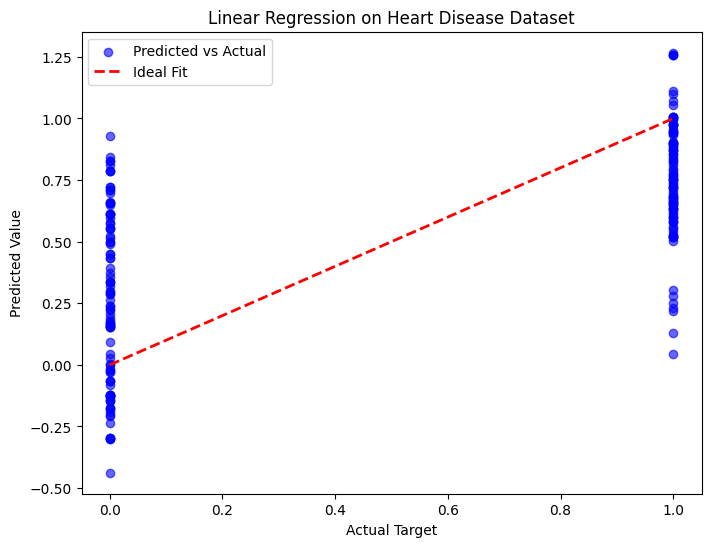


=== CLASSIFICATION METRICS ===
Confusion Matrix:
 [[73 29]
 [13 90]]
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902


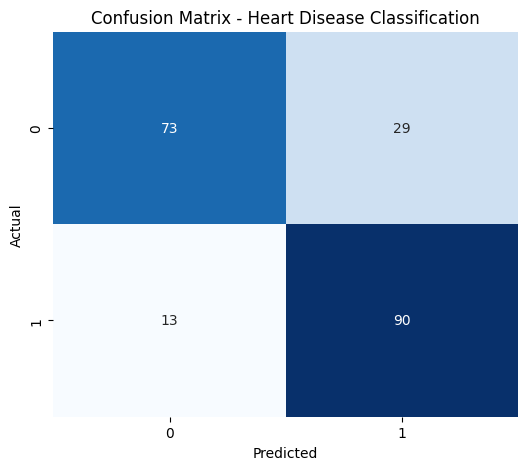

In [5]:

from google.colab import files
uploaded = files.upload()

#  Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, accuracy_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset
df = pd.read_csv("heart.csv")
print("First 20 rows of dataset:")
display(df.head(20))

#  Split features and target
X = df.drop("target", axis=1)
y = df["target"]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =====================
# Linear Regression
# =====================
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_reg_pred = reg_model.predict(X_test)

# Regression metrics
print("\n=== REGRESSION METRICS ===")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_reg_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_reg_pred))
print("R² Score:", r2_score(y_test, y_reg_pred))

# Regression plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_reg_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([0,1], [0,1], 'r--', linewidth=2, label="Ideal Fit")  # straight line
plt.xlabel("Actual Target")
plt.ylabel("Predicted Value")
plt.title("Linear Regression on Heart Disease Dataset")
plt.legend()
plt.show()

# =====================
# Logistic Regression
# =====================
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_train)
y_clf_pred = clf_model.predict(X_test)

# Classification metrics
cm = confusion_matrix(y_test, y_clf_pred)
print("\n=== CLASSIFICATION METRICS ===")
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_clf_pred))
print("Precision:", precision_score(y_test, y_clf_pred))
print("Recall:", recall_score(y_test, y_clf_pred))

# Confusion matrix plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heart Disease Classification")
plt.show()


Actual vs Predicted (First 20 rows):


,Actual,Predicted
527,1,0.932269
359,1,1.259070
447,0,0.026185
31,1,0.943203
621,0,0.157829
590,1,0.599788
905,0,-0.063850
737,0,-0.146730
76,1,0.762486
948,0,-0.019538


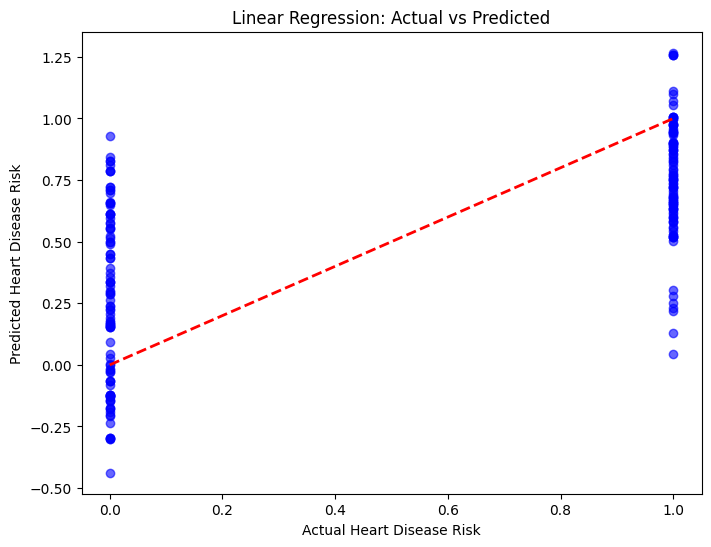

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for comparison
reg_comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_reg_pred
})

# Display first 20 rows
print("Actual vs Predicted (First 20 rows):")
display(reg_comparison.head(20))

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_reg_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Heart Disease Risk")
plt.ylabel("Predicted Heart Disease Risk")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


First 20 rows of dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0



Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

=== LINEAR REGRESSION METRICS ===
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.148
R² Score: 0.41


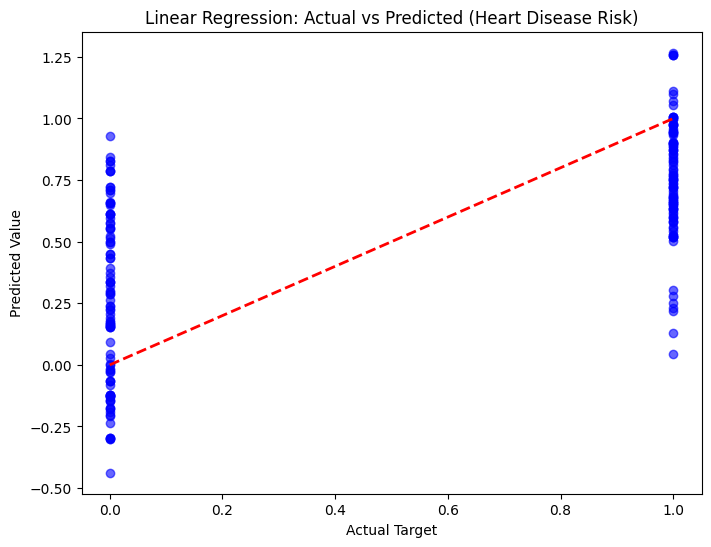


=== LOGISTIC REGRESSION METRICS ===
Confusion Matrix:
 [[73 29]
 [13 90]]
Accuracy: 0.795
Precision: 0.756
Recall: 0.874


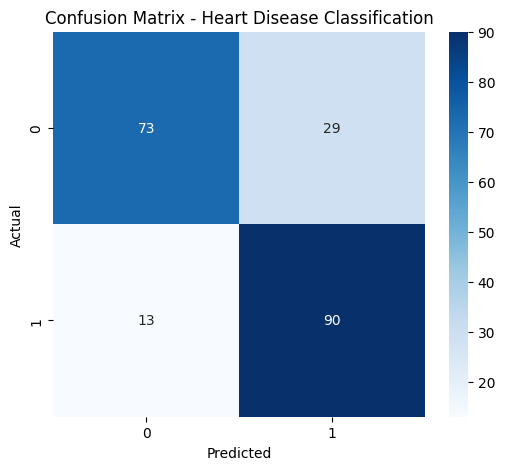

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_name = "heart.csv"  # Make sure this file is uploaded in Colab
df = pd.read_csv(file_name)

# Display first 20 rows
print("First 20 rows of dataset:")
display(df.head(20))

# Check missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# LINEAR REGRESSION (Risk Prediction)
# ===============================
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_reg_pred = reg_model.predict(X_test)

# Regression Metrics
print("\n=== LINEAR REGRESSION METRICS ===")
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_reg_pred), 3))
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_reg_pred), 3))
print("R² Score:", round(r2_score(y_test, y_reg_pred), 3))

# Regression Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_reg_pred, color='blue', alpha=0.6)
plt.plot([0,1],[0,1],'r--', lw=2)  # diagonal line
plt.xlabel("Actual Target")
plt.ylabel("Predicted Value")
plt.title("Linear Regression: Actual vs Predicted (Heart Disease Risk)")
plt.show()

# ===============================
# LOGISTIC REGRESSION (Classification)
# ===============================
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train, y_train)
y_clf_pred = clf_model.predict(X_test)

# Classification Metrics
cm = confusion_matrix(y_test, y_clf_pred)
print("\n=== LOGISTIC REGRESSION METRICS ===")
print("Confusion Matrix:\n", cm)
print("Accuracy:", round(accuracy_score(y_test, y_clf_pred), 3))
print("Precision:", round(precision_score(y_test, y_clf_pred), 3))
print("Recall:", round(recall_score(y_test, y_clf_pred), 3))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heart Disease Classification")
plt.show()


First 20 rows of dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0



Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

First 20 rows of TRAINING data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
770,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
530,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
827,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
411,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0



First 20 rows of TESTING data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
590,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
905,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
76,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
948,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0



=== LINEAR REGRESSION METRICS ===
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.148
R² Score: 0.41


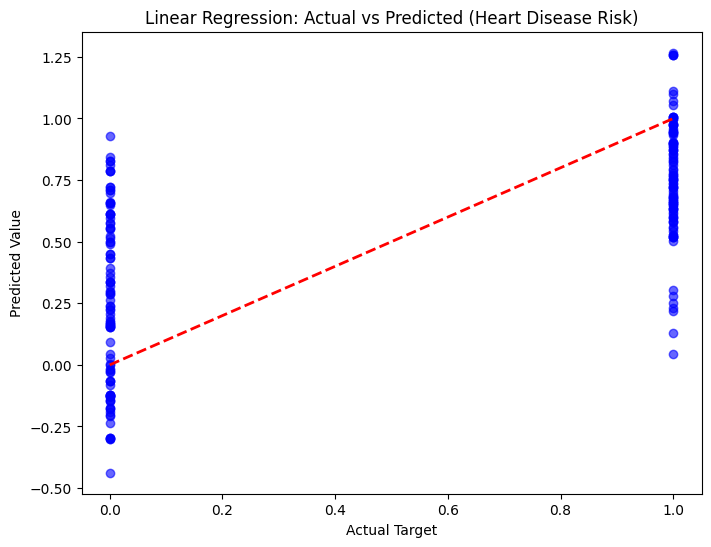


=== LOGISTIC REGRESSION METRICS ===
Confusion Matrix:
 [[73 29]
 [13 90]]
Accuracy: 0.795
Precision: 0.756
Recall: 0.874


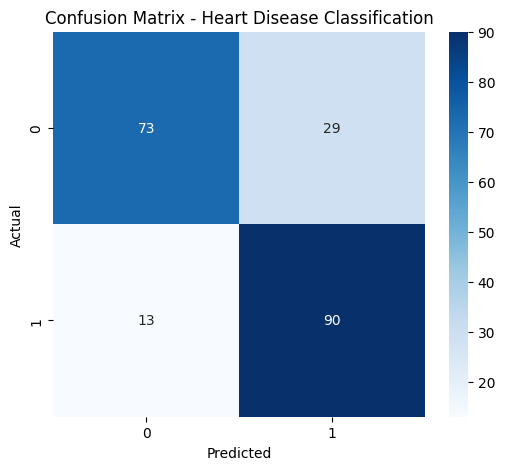

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_name = "heart.csv"  # Upload in Colab
df = pd.read_csv(file_name)

# Display first 20 rows of the dataset
print("First 20 rows of dataset:")
display(df.head(20))

# Check missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show first 20 rows of training data
print("\nFirst 20 rows of TRAINING data:")
train_display = pd.DataFrame(X_train, columns=X.columns)
train_display["target"] = y_train.values
display(train_display.head(20))

# Show first 20 rows of testing data
print("\nFirst 20 rows of TESTING data:")
test_display = pd.DataFrame(X_test, columns=X.columns)
test_display["target"] = y_test.values
display(test_display.head(20))

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# LINEAR REGRESSION (Risk Prediction)
# ===============================
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)
y_reg_pred = reg_model.predict(X_test_scaled)

# Regression Metrics
print("\n=== LINEAR REGRESSION METRICS ===")
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_reg_pred), 3))
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_reg_pred), 3))
print("R² Score:", round(r2_score(y_test, y_reg_pred), 3))

# Regression Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_reg_pred, color='blue', alpha=0.6)
plt.plot([0,1],[0,1],'r--', lw=2)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Value")
plt.title("Linear Regression: Actual vs Predicted (Heart Disease Risk)")
plt.show()

# ===============================
# LOGISTIC REGRESSION (Classification)
# ===============================
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_scaled, y_train)
y_clf_pred = clf_model.predict(X_test_scaled)

# Classification Metrics
cm = confusion_matrix(y_test, y_clf_pred)
print("\n=== LOGISTIC REGRESSION METRICS ===")
print("Confusion Matrix:\n", cm)
print("Accuracy:", round(accuracy_score(y_test, y_clf_pred), 3))
print("Precision:", round(precision_score(y_test, y_clf_pred), 3))
print("Recall:", round(recall_score(y_test, y_clf_pred), 3))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heart Disease Classification")
plt.show()
